In [35]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

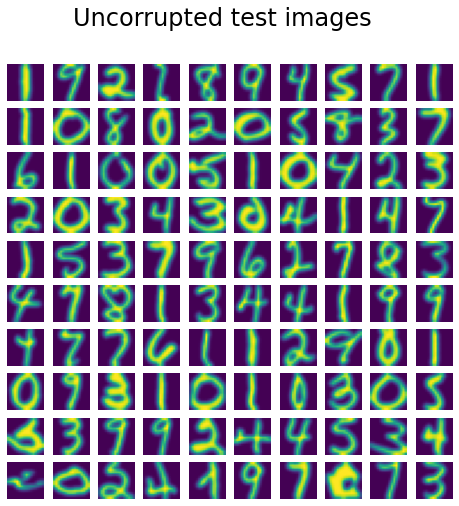

In [33]:
X,y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, train_size=1_000, test_size=100)

rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise


def plot_digits(X, title):
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8,8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16,16)))
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(X_test, "Uncorrupted test images")

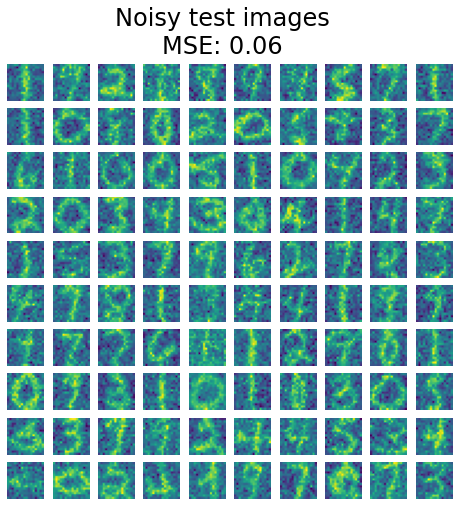

In [34]:
plot_digits(
    X_test_noisy, f"Noisy test images\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)

In [61]:
pca = PCA(n_components=32)
kernel_pca = KernelPCA(
    n_components=1000, kernel='rbf',gamma=1e-5, fit_inverse_transform=True, alpha=5e-8
)

pca.fit(X_train_noisy)
_ = kernel_pca.fit(X_train_noisy)

In [39]:
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(X_test_noisy)
)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))


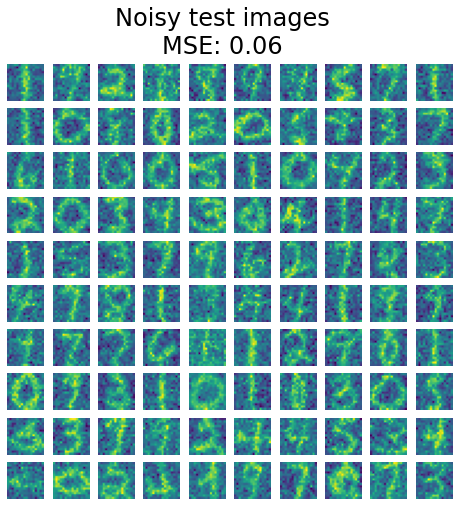

In [46]:
plot_digits(
    X_test_noisy, f"Noisy test images\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)

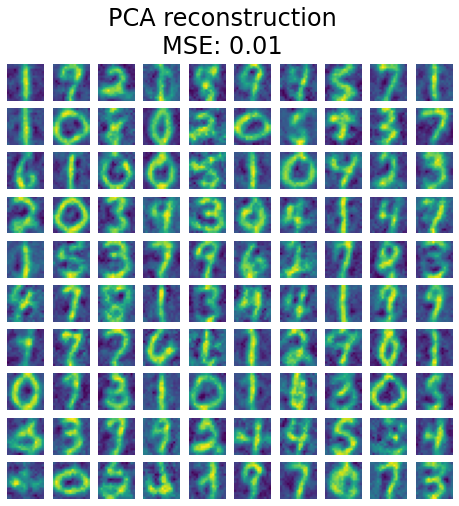

In [62]:
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)

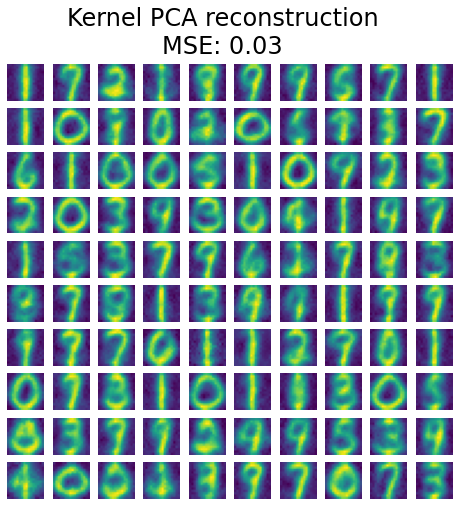

In [60]:
plot_digits(
    X_reconstructed_kernel_pca,
    "Kernel PCA reconstruction\n"
    f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}",
)